In [27]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
#Importing the dataset
data=pd.read_csv("train.csv")

In [31]:
#Display the first 5 entries of the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
#Shape of the dataset
data.shape

(891, 12)

In [35]:
#Basic information about the features and checking the datatypes in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
#Descriptive statistics for numerical features in the dataset
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
#columns in the dataset
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [41]:
#Identify and handle missing values using .isnull()
missing_percentage = data.isnull().sum() / len(data) * 100
print(missing_percentage)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [47]:
#Filling the null values with median in Age column.

data['Age'] = data['Age'].fillna(data['Age'].median())

#Filling the null values with mode in Embarked column.

data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])


In [49]:
#Drop cabin column as it has too many missing values
data.drop('Cabin', axis=1, inplace=True)



In [51]:
#checking is there any null values present after filling values.
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [53]:
data.value_counts()

PassengerId  Survived  Pclass  Name                                      Sex     Age   SibSp  Parch  Ticket      Fare    Embarked
1            0         3       Braund, Mr. Owen Harris                   male    22.0  1      0      A/5 21171   7.250   S           1
599          0         3       Boulos, Mr. Hanna                         male    28.0  0      0      2664        7.225   C           1
588          1         1       Frolicher-Stehli, Mr. Maxmillian          male    60.0  1      1      13567       79.200  C           1
589          0         3       Gilinski, Mr. Eliezer                     male    22.0  0      0      14973       8.050   S           1
590          0         3       Murdlin, Mr. Joseph                       male    28.0  0      0      A./5. 3235  8.050   S           1
                                                                                                                                    ..
301          1         3       Kelly, Miss. Anna Katherine "

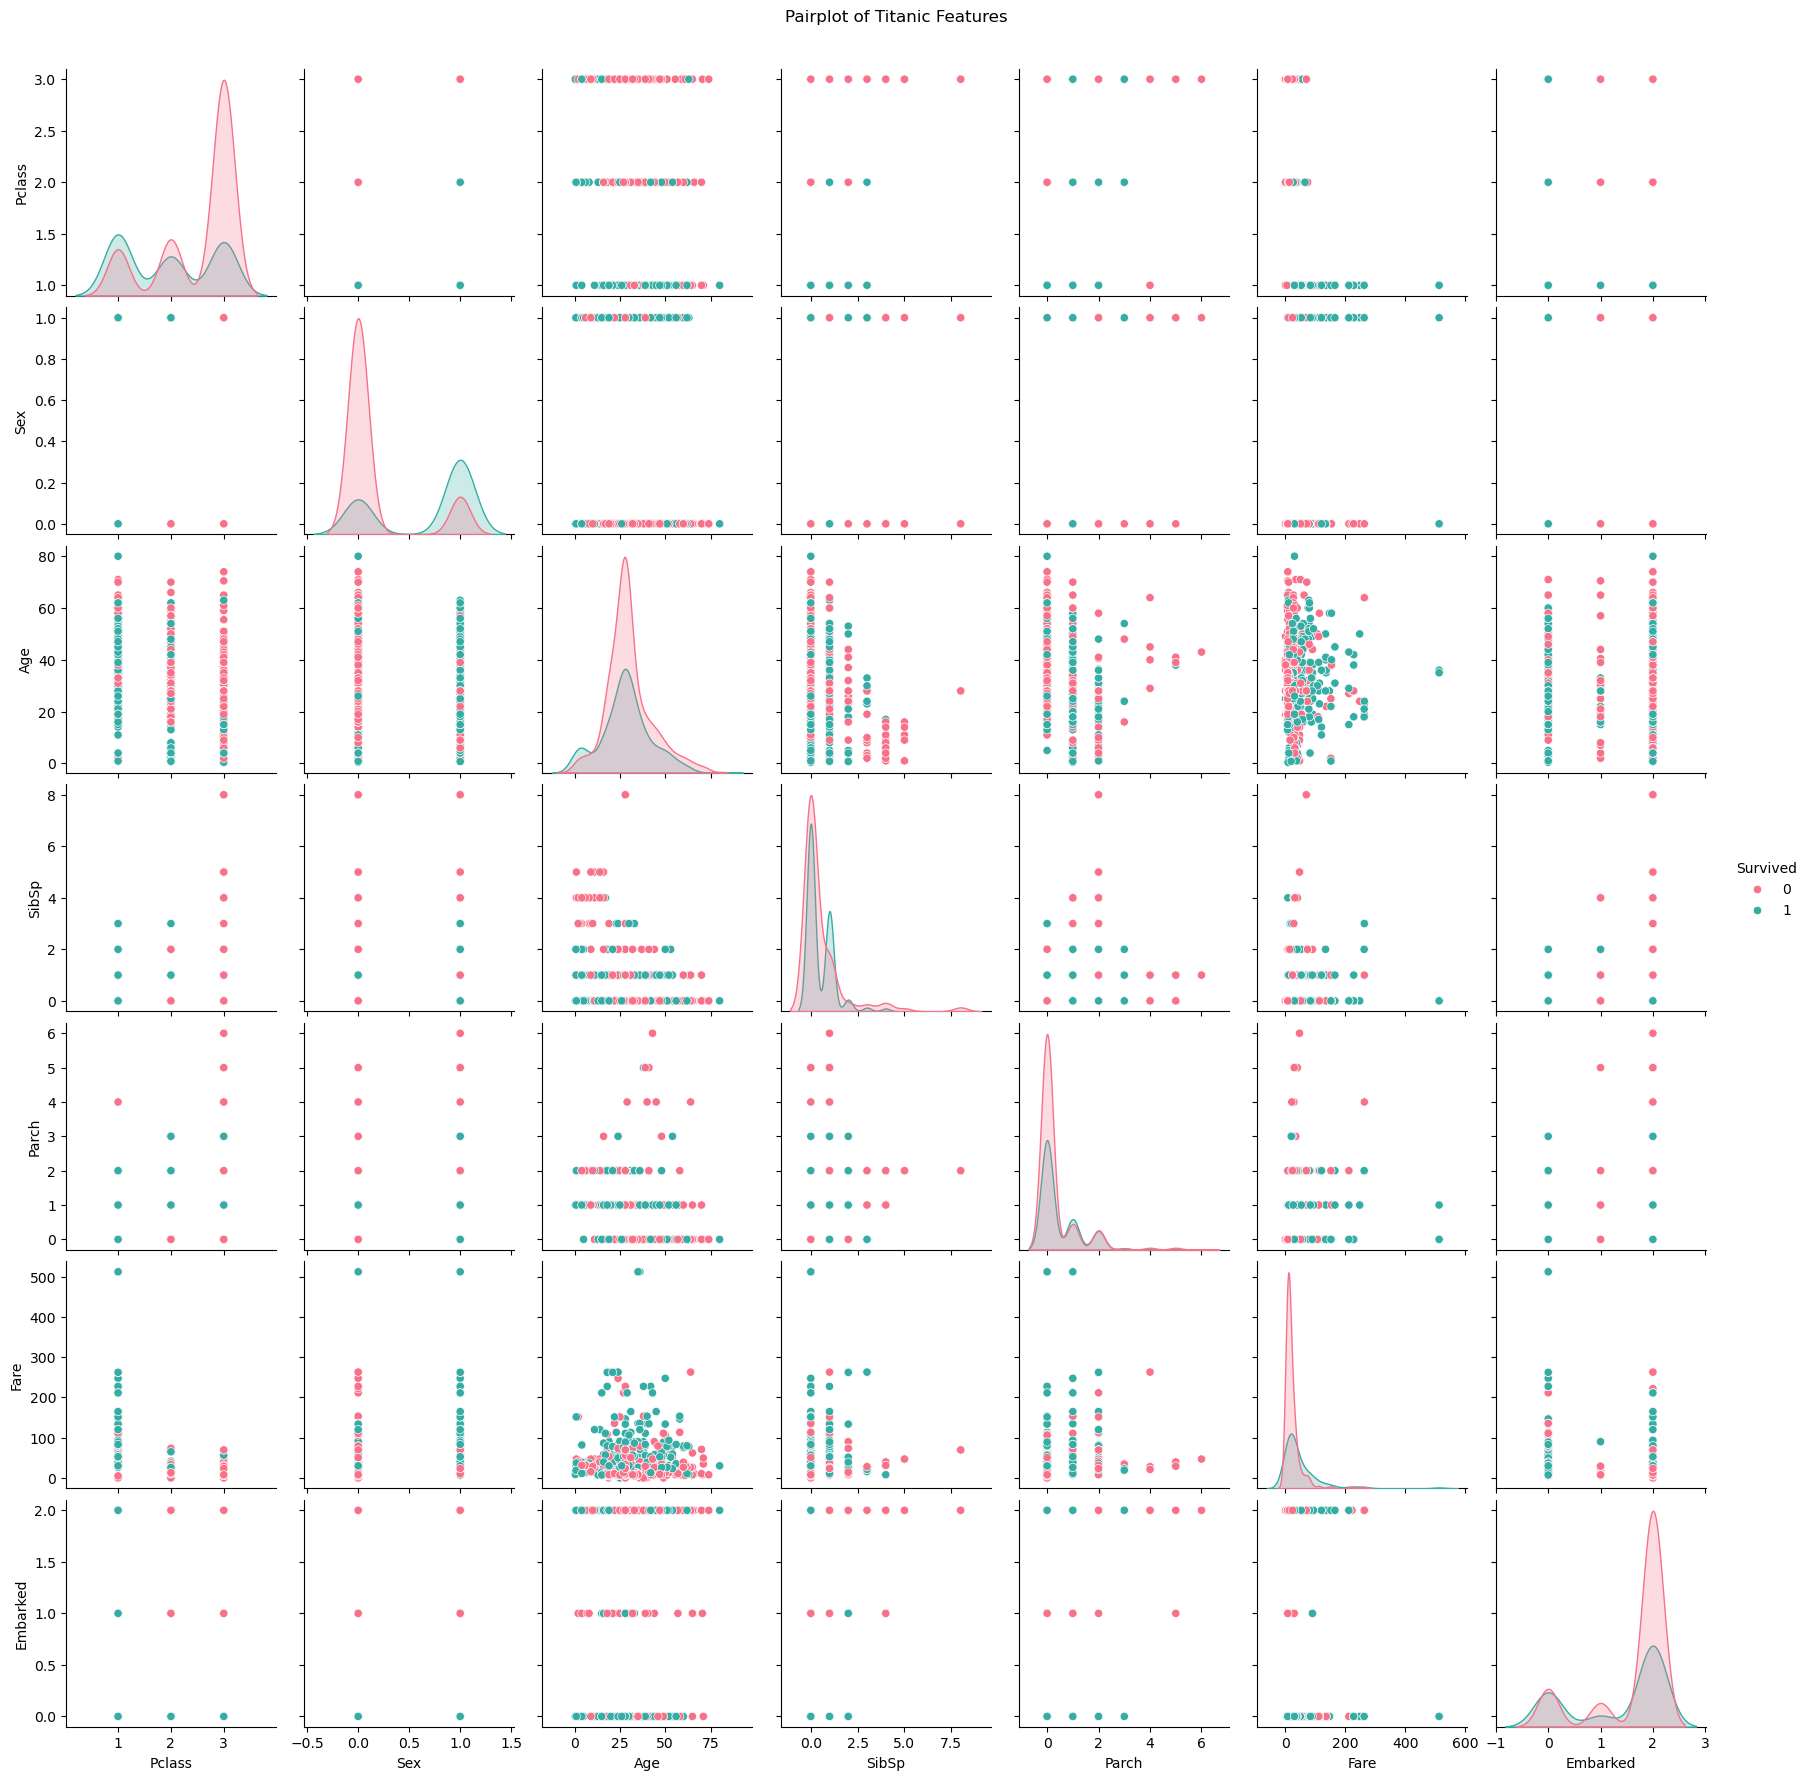

In [55]:
selected_cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# But first encode 'Sex' and 'Embarked' because pairplot can't plot strings
data_encoded = data.copy()
data_encoded['Sex'] = data_encoded['Sex'].map({'male': 0, 'female': 1})
data_encoded['Embarked'] = data_encoded['Embarked'].map({'C':0, 'Q':1, 'S':2})

# Plot
sns.pairplot(data_encoded[selected_cols], hue='Survived', diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Titanic Features', y=1.02)
plt.show()

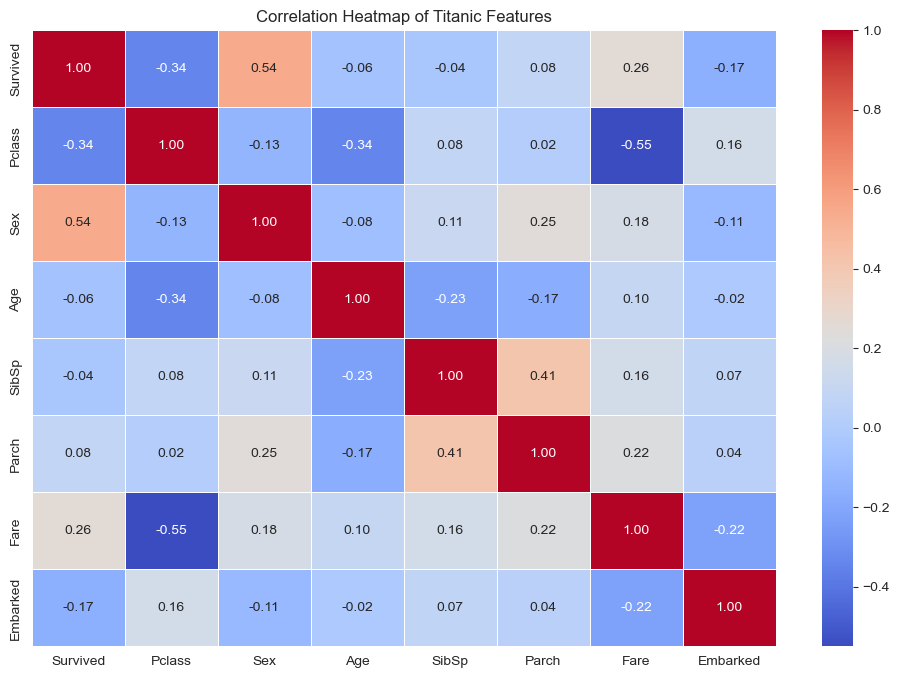

In [73]:
# Correlation matrix


# Correlation matrix
corr = data_encoded[selected_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Titanic Features')
plt.show()

In [75]:
sns.set_style('whitegrid')


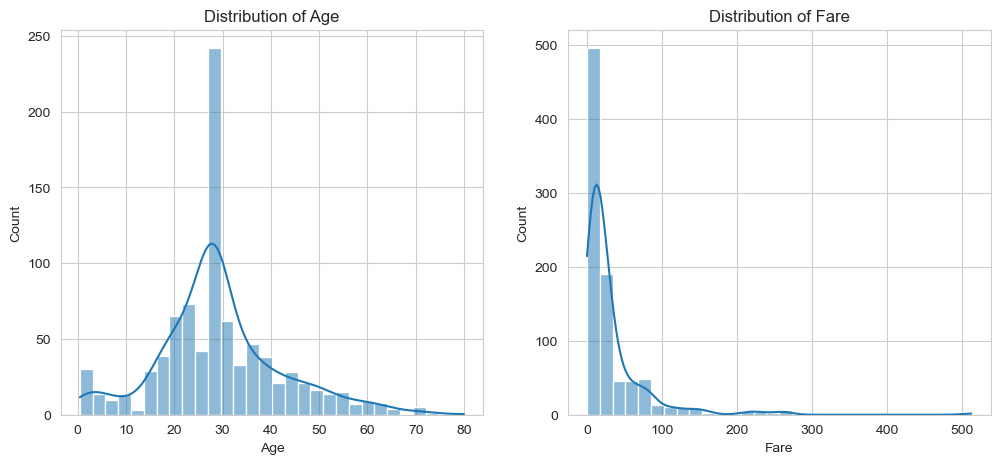

In [77]:
#plotting histograms
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(data['Age'],kde=True,bins=30)
plt.title('Distribution of Age')

plt.subplot(1,2,2)
sns.histplot(data['Fare'],kde=True,bins=30)
plt.title('Distribution of Fare')

plt.show()


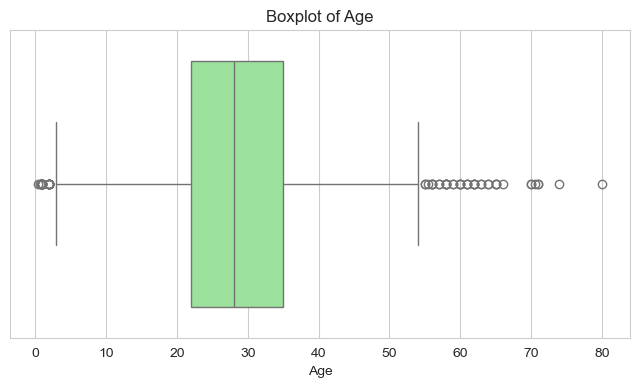

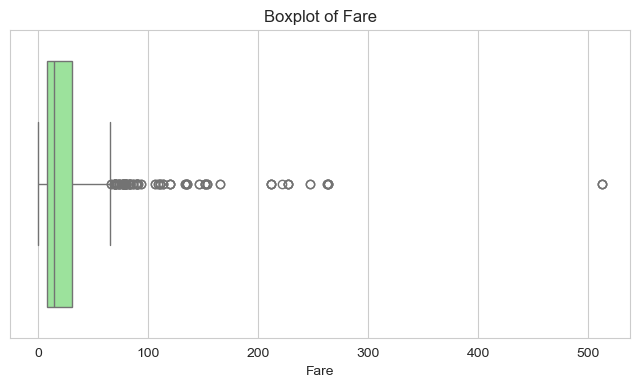

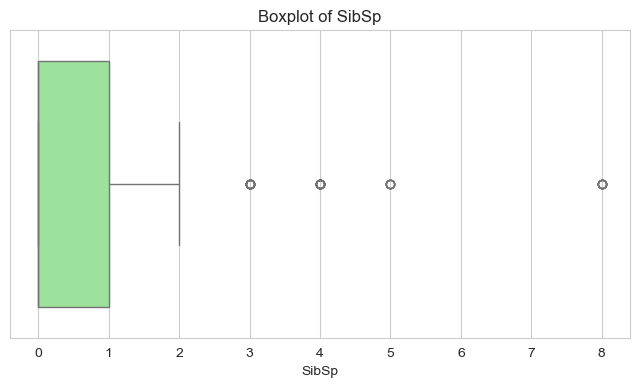

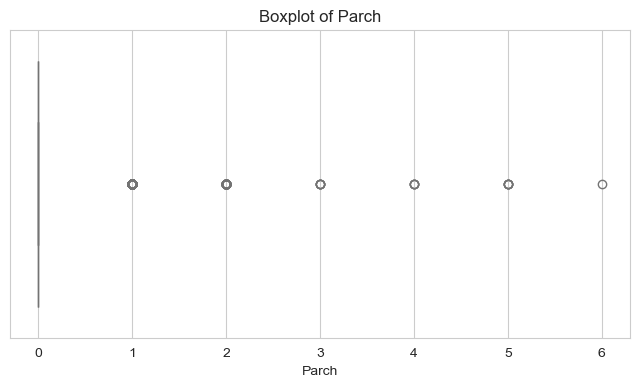

In [79]:
# Boxplots for numerical features
for col in ['Age', 'Fare', 'SibSp', 'Parch']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()

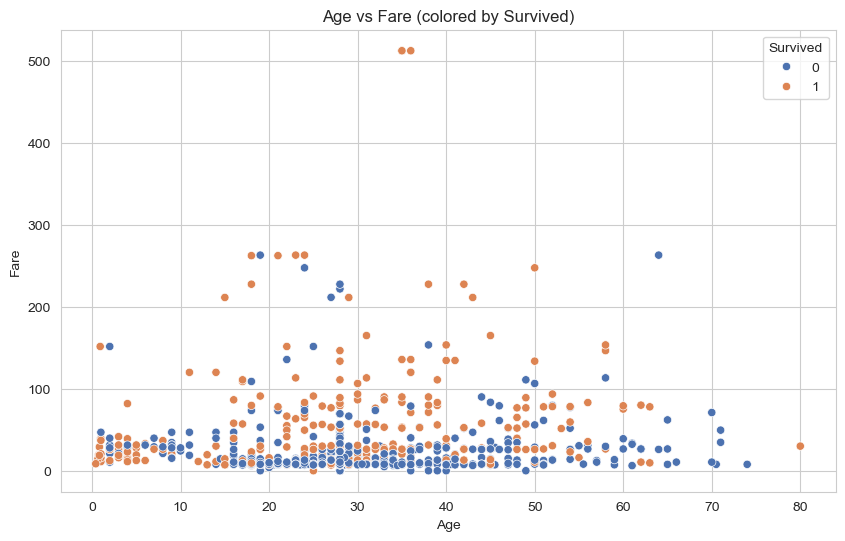

In [83]:
#plotting scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Age', y='Fare', hue='Survived', palette='deep')
plt.title('Age vs Fare (colored by Survived)')
plt.show()

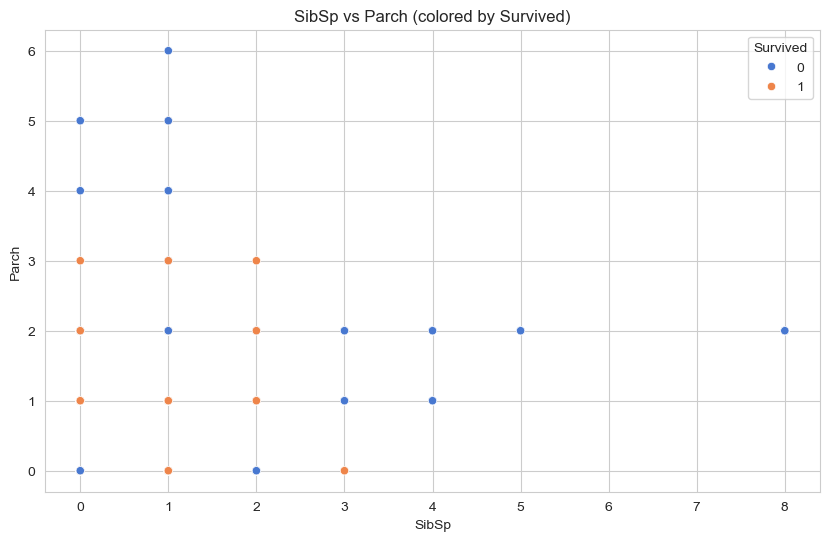

In [87]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='SibSp', y='Parch', hue='Survived', palette='muted')
plt.title('SibSp vs Parch (colored by Survived)')
plt.show()